In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/bench2 - mahalanobis.csv', header = 1)
df

,Unnamed: 0,Percentile,Classe,Precision,Recall,F1 score,F2 score,F2 Macro Avg,F2 Weighted Avg
0,NaN,10.0,1,0.64,0.09,0.16,0.11,0.37,0.27
1,NaN,NaN,2,0.29,0.88,0.44,0.63,NaN,NaN
2,NaN,30.0,1,0.69,0.30,0.42,0.34,0.44,0.40
3,NaN,NaN,2,0.30,0.69,0.42,0.55,NaN,NaN
4,NaN,50.0,1,0.73,0.52,0.61,0.55,0.52,0.53
5,NaN,NaN,2,0.33,0.55,0.41,0.49,NaN,NaN
6,NaN,70.0,1,0.71,0.71,0.71,0.71,0.52,0.60
7,NaN,NaN,2,0.33,0.33,0.33,0.33,NaN,NaN
8,NaN,90.0,1,0.72,0.92,0.81,0.87,0.52,0.66
9,NaN,NaN,2,0.44,0.15,0.22,0.17,NaN,NaN


In [3]:
df.fillna(method='ffill', inplace=True)
df

<ipython-input-3-d92a16ab55af>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,Unnamed: 0,Percentile,Classe,Precision,Recall,F1 score,F2 score,F2 Macro Avg,F2 Weighted Avg
0,NaN,10.0,1,0.64,0.09,0.16,0.11,0.37,0.27
1,NaN,10.0,2,0.29,0.88,0.44,0.63,0.37,0.27
2,NaN,30.0,1,0.69,0.30,0.42,0.34,0.44,0.40
3,NaN,30.0,2,0.30,0.69,0.42,0.55,0.44,0.40
4,NaN,50.0,1,0.73,0.52,0.61,0.55,0.52,0.53
5,NaN,50.0,2,0.33,0.55,0.41,0.49,0.52,0.53
6,NaN,70.0,1,0.71,0.71,0.71,0.71,0.52,0.60
7,NaN,70.0,2,0.33,0.33,0.33,0.33,0.52,0.60
8,NaN,90.0,1,0.72,0.92,0.81,0.87,0.52,0.66
9,NaN,90.0,2,0.44,0.15,0.22,0.17,0.52,0.66


In [4]:
df = df.drop(columns=df.columns[0])
df

,Percentile,Classe,Precision,Recall,F1 score,F2 score,F2 Macro Avg,F2 Weighted Avg
0,10.0,1,0.64,0.09,0.16,0.11,0.37,0.27
1,10.0,2,0.29,0.88,0.44,0.63,0.37,0.27
2,30.0,1,0.69,0.30,0.42,0.34,0.44,0.40
3,30.0,2,0.30,0.69,0.42,0.55,0.44,0.40
4,50.0,1,0.73,0.52,0.61,0.55,0.52,0.53
5,50.0,2,0.33,0.55,0.41,0.49,0.52,0.53
6,70.0,1,0.71,0.71,0.71,0.71,0.52,0.60
7,70.0,2,0.33,0.33,0.33,0.33,0.52,0.60
8,90.0,1,0.72,0.92,0.81,0.87,0.52,0.66
9,90.0,2,0.44,0.15,0.22,0.17,0.52,0.66


In [5]:
df = df.rename(columns={'Precision ': 'Precision'})


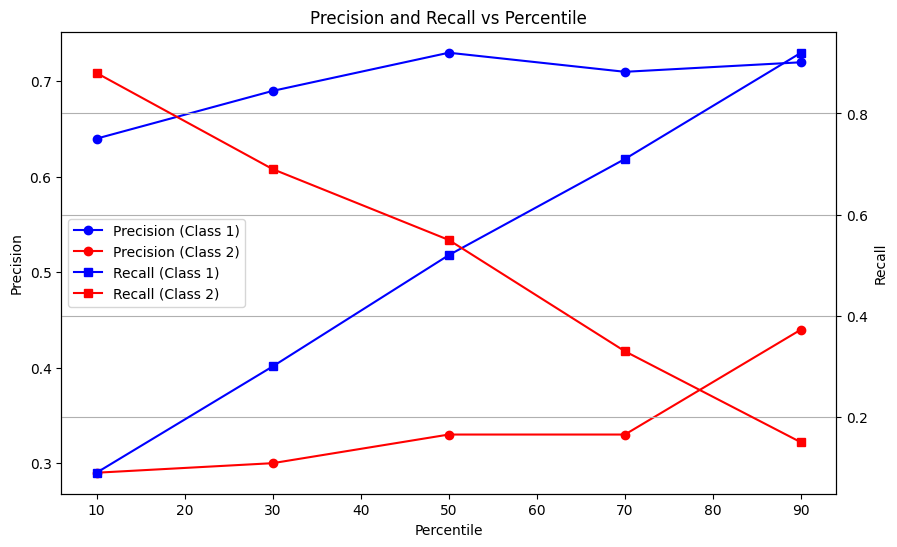

In [6]:
fig, ax1 = plt.subplots(figsize=(10, 6))

df[df['Classe'] == 1].plot(x='Percentile', y='Precision', ax=ax1, label='Precision (Class 1)', color='blue', marker='o', legend=False)

df[df['Classe'] == 2].plot(x='Percentile', y='Precision', ax=ax1, label='Precision (Class 2)', color='red', marker = 'o',  legend=False)

ax2 = ax1.twinx()

df[df['Classe'] == 1].plot(x='Percentile', y='Recall', ax=ax2, label='Recall (Class 1)', color='blue', marker = 's', legend=False)

df[df['Classe'] == 2].plot(x='Percentile', y='Recall', ax=ax2, label='Recall (Class 2)', color='red', marker = 's',  legend=False)

ax1.set_xlabel('Percentile')
ax1.set_ylabel('Precision', color='black')
ax2.set_ylabel('Recall', color='black')
plt.title('Precision and Recall vs Percentile')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center left')

plt.grid(True)
plt.show()